# Classification Algorithms on Iris Dataset

Here we implement classification algorithms on the iris dataset and compare their performance using Python and it's scientific computing modules. 

In [0]:
#Import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

#Set plot parameters using matplotlib
matplotlib.rc('xtick', color = 'white')
matplotlib.rc('ytick', color = 'white')
matplotlib.rc('axes', edgecolor = 'white')
matplotlib.rc('text', color = 'white')
matplotlib.rc('axes', labelcolor = 'white')

# Step 1: Loading and understanding the data

In [0]:
#Load iris dataset from datasets class of sklearn
iris = datasets.load_iris()

#Print top 5 rows of the features
print('Features:\n', iris.data[0:5])
#Print top 5 rows of the label 
print('Labels: \n', iris.target[0:5])

Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels: 
 [0 0 0 0 0]


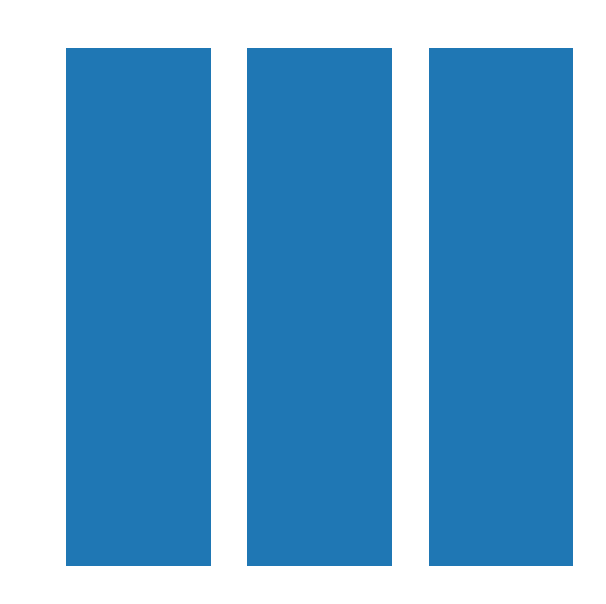

In [0]:
#Plot the count of classes in the label 
plt.figure(figsize=(10,10))
plt.bar(x = ['0','1','2'], height = np.unique(iris.target, return_counts = True)[1])
plt.title("Target's classes and counts")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

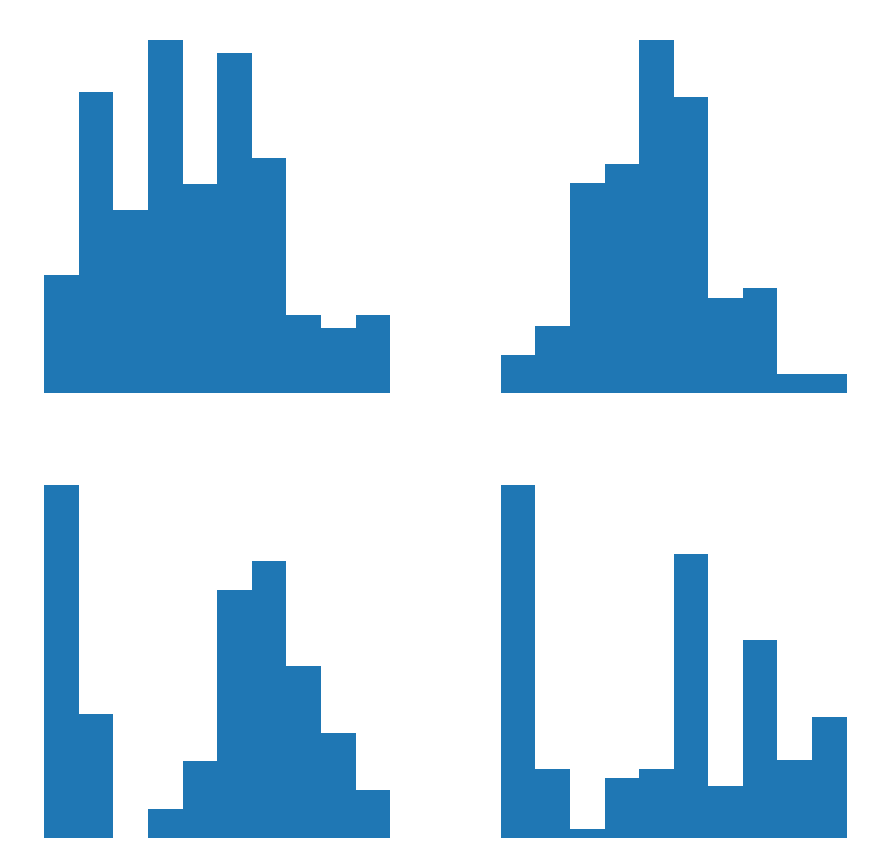

In [0]:
#Visualizing distribution of features
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,15))
ax[0][0].hist(iris.data[:,0])
ax[0][0].set_title("Distribution of feature 1")
ax[0][1].hist(iris.data[:,1])
ax[0][1].set_title("Distribution of feature 2")
ax[1][0].hist(iris.data[:,2])
ax[1][0].set_title("Distribution of feature 3")
ax[1][1].hist(iris.data[:,3])
ax[1][1].set_title("Distribution of feature 4")
fig.show()

- Features are along various sclaes so let's standardize the data

In [0]:
#Using StandardScaler from sklearn preprocessing
iris_x = StandardScaler().fit_transform(iris.data)

- In order to better understand class seperation let's reduce the 4 dimensional data to 2 dimensions.
- Using PCA to convert data from, $R^4 \rightarrow R^2$ and plotting it with labels as legend. 

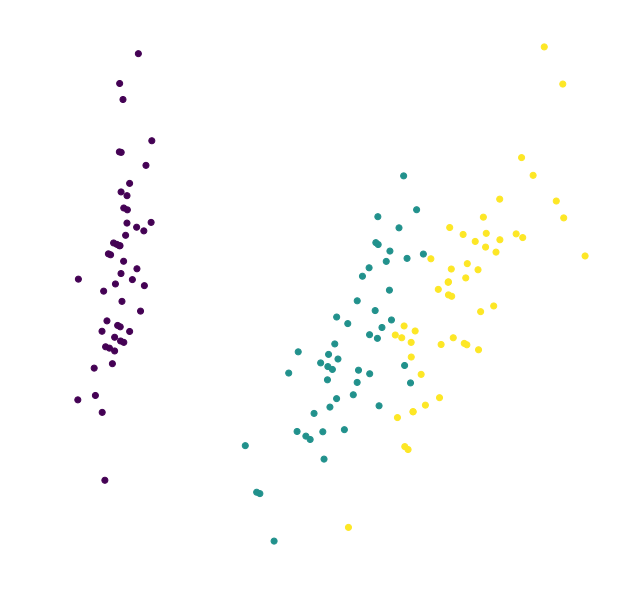

In [0]:
#Projecting features to 2 dimensions to understand seperation of classes
pca = PCA(n_components=2)
pca.fit(iris.data)
pca.n_components_

#Join the reduced array with labels
iris_reduced = np.vstack((iris_x_reduced[:,0], iris_x_reduced[:,1], iris.target)).T

#Plot the dataset across it's 2 PC
plt.figure(figsize=(10,10))
plt.scatter(iris_reduced[:,0], iris_reduced[:,1], c = iris_reduced[:,2])
plt.title("Iris dataset across it's Principal Components")
plt.xlabel("Principal Component - 1")
plt.ylabel("Principal Component - 2")
plt.show()

- As we can see above, there seems to be great seperation among the classes.

# Step 2: Classifying the iris dataset

- First, let's convert the data into train/test split. 

In [0]:
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_x, 
                                                                        iris.target, 
                                                                        test_size=0.33, 
                                                                        random_state=7)

## Model Fitting and Prediction

- Let's create a simple function that takes in a model obeject fit's it to the training data and predict's on the test data. 

In [0]:
def get_predicitons(model, train_x, train_y, test_x):
  """Fit model to data and return biniary and probabilistic prediction
  
  Args:
  model: type of classification algorithm used
  train_x: features of the training data
  train_y: label of the training data
  test_x: features of the test data
  test_y: labels of the test data

  Return:
  pred = biniary prediction
  pred_prob = probabilistic estimation of the prediction
  """
  model.fit(train_x, train_y)
  pred = model.predict(test_x)
  pred_prob = model.predict_proba(test_x)
  return (pred, pred_prob)


### Using non-parametric models: 
- KNN Classifier
- RandomForest

In [0]:
#KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn_pred, knn_pred_prob = get_predicitons(knn, iris_x_train, iris_y_train, iris_x_test)
#RandomForest
rf = RandomForestClassifier(max_depth=2, random_state=4)
rf_pred, rf_pred_prob = get_predicitons(dt, iris_x_train, iris_y_train, iris_x_test)

### Using parametric model:
- Gaussian Naive Bayes

In [0]:
#Gaussian naive bayes
gnb = GaussianNB()
gnb_pred, gnb_pred_prob = get_predicitons(gnb, iris_x_train, iris_y_train, iris_x_test)

# Step 3: Model Comparision

 - Let's look at confusion matrix of all predictions

In [0]:
def get_confusion_matrix(test_y, model_prediction):
  """Get confusion matrix
  
  Args:
  test_y: Test values
  model_predictions: biniary prediction values of the model
  
  Return:
  prints confusion matrix as a pandas df
  """
  cm = confusion_matrix(test_y, model_prediction)
  cm_df = pd.DataFrame({'True 0' : cm[:,0], 'True 1': cm[:,1], 'True 2' : cm[:,2]})
  print(cm_df, '\n')
  print(classification_report(test_y, model_prediction, digits=3))



In [0]:
#Confusion matrix and performance report for KNN Classifier
print("Model performance stats for KNN Classifier \n")
get_confusion_matrix(iris_y_test, knn_pred)

Model performance stats for KNN Classifier 

   True 0  True 1  True 2
0      13       1       0
1       0      18       0
2       0       3      15 

              precision    recall  f1-score   support

           0      1.000     0.929     0.963        14
           1      0.818     1.000     0.900        18
           2      1.000     0.833     0.909        18

    accuracy                          0.920        50
   macro avg      0.939     0.921     0.924        50
weighted avg      0.935     0.920     0.921        50



In [0]:
#Confusion matrix and performance report for RandomForest
print("Model performance stats for RandomForest Classifier \n")
get_confusion_matrix(iris_y_test, rf_pred)

Model performance stats for RandomForest Classifier 

   True 0  True 1  True 2
0      14       0       0
1       0      17       1
2       0       4      14 

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        14
           1      0.810     0.944     0.872        18
           2      0.933     0.778     0.848        18

    accuracy                          0.900        50
   macro avg      0.914     0.907     0.907        50
weighted avg      0.907     0.900     0.899        50



In [0]:
#Confusion matrix and performance report for Gaussian Naive bayes
print("Model performance stats for Gaussian Naive bayes Classifier \n")
get_confusion_matrix(iris_y_test, gnb_pred)

Model performance stats for Gaussian Naive bayes Classifier 

   True 0  True 1  True 2
0      14       0       0
1       0      15       3
2       0       2      16 

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        14
           1      0.882     0.833     0.857        18
           2      0.842     0.889     0.865        18

    accuracy                          0.900        50
   macro avg      0.908     0.907     0.907        50
weighted avg      0.901     0.900     0.900        50



Text(0, 0.5, 'F1 Score')

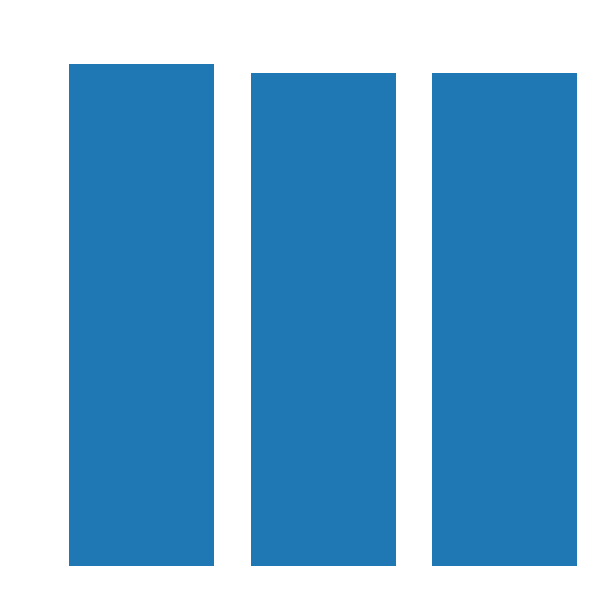

In [0]:
all_f1_x = ['KNN-C', 'RF', 'GNB']
all_f1_score = [0.924, 0.907, 0.907]
plt.figure(figsize=(10,10))
plt.bar(all_f1_x, all_f1_score)
plt.yticks(np.arange(0,1.1,0.1))
plt.title("F1 scores of the 3 models")
plt.xlabel("Model")
plt.ylabel("F1 Score")

From the above model plot we can observe that KNN-C obtains a slighter better F1-Score of 0.924 as compared to 0.907 of RF and GNB. 

